Suorita ainakin minuutin mittainen havaintosarja, jonka aikana kävelet tasaista reipasta vauhtia ja samalla mittaat kiihtyvyyttä Phyphox -sovelluksella. Voit pitää puhelinta mittauksen aikana kädessä tai taskussa jne., mutta älä muuta paikkaa mittauksen aikana. Laske askeleesi kävelyn aikana ja merkitse tulos muistiin.

a: Tuo havainto data Pythoniin ja piirrä sen kuvaaja.

b: Tutki, miten askelet näkyvät havainnoissa jaksollisena liikkeenä

c: Määrittele, mikä kiihtyvyyden komponentti näyttää jaksollisuuden parhaiten ja valitse se seuraaviin kohtiin.

d: Määritä suodatus, jonka avulla voit poistaa valitusta kiihtyvyyden komponentista selvästi askeltaajuutta pienemmät ja suuremmat taajuudet.

e: Laske askelten määrä suodatetusta datasta, voit esimerkiksi tutkia nollakohtien ylityksien, tai minimien ja maksimien määrää.

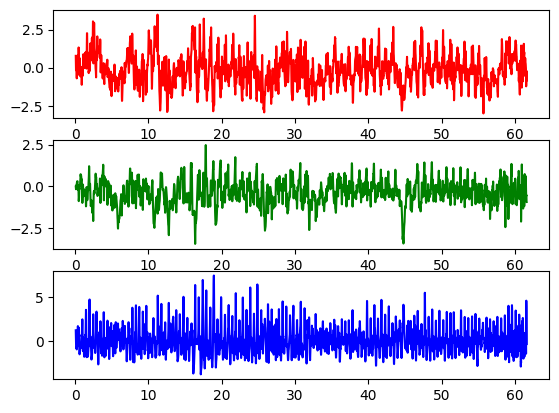

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Acceleration.csv') #Time (s)
df.head()

plt.subplot(3,1,1)
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], color='r')
plt.subplot(3,1,2)
#Valitaan tarkasteltavaksi kuvaaja 7
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], color='g')
plt.subplot(3,1,3)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], color='b')

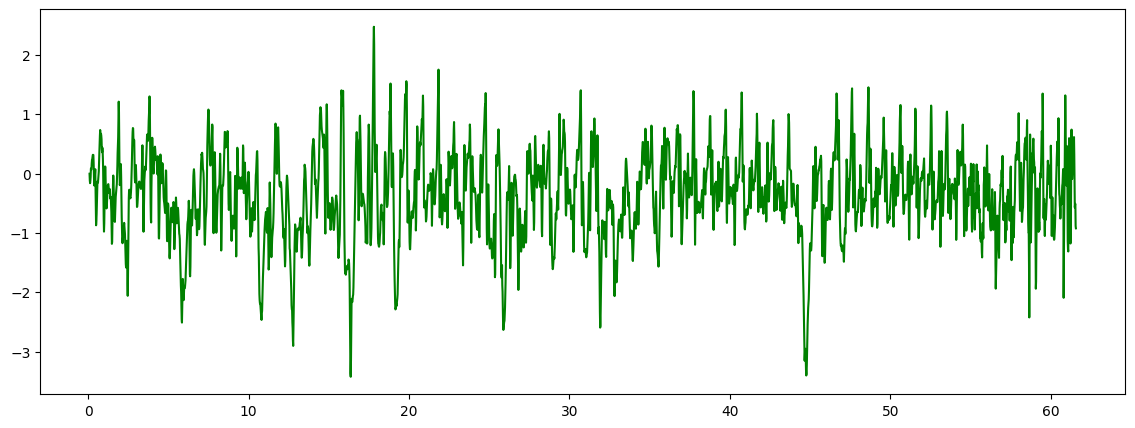

In [18]:
#Valitaan tarkasteltavaksi kuvaaja Y ja tehdään siitä kuvaaja tarkasteltavaksi
plt.figure(figsize=(14, 5))
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], color='g')

(np.float64(0.0), np.float64(20.0), np.float64(-3.0), np.float64(3.0))

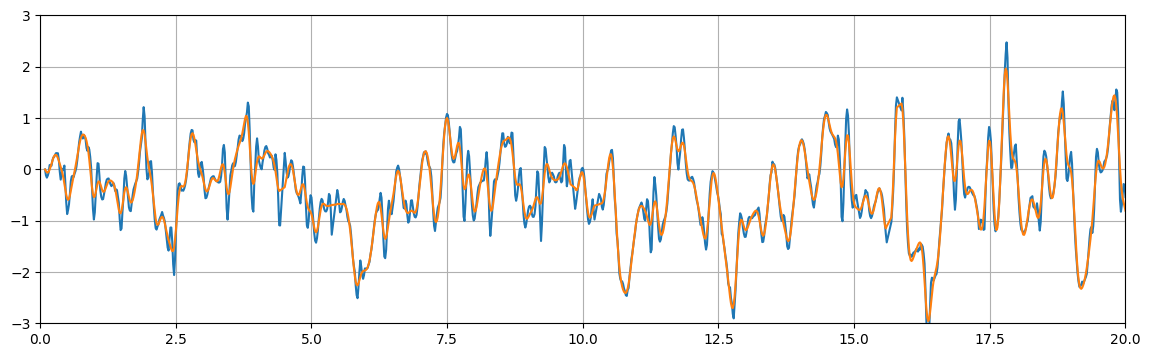

In [26]:
#Suodatetaan datasta selvästi kävelytaajuutta suurempitaajuuksiset vaihtelut pois
#filtteri:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

#Filtereiden parametrit:
T = df['Time (s)'][len(df['Time (s)'])-1] - df['Time (s)'][0]
n = len(df['Time (s)']) #Datapisteiden lukumäärä
fs = n/T #Näytteenotto (olettaen jotakuinkin vakioksi)
nyq = fs/2 #Nyqvistin taajuus
order = 3 #Kertaluku
cutoff = 1/(0.2) #Cutoff taajuus

filtered_signal = butter_lowpass_filter(df['Linear Acceleration y (m/s^2)'], cutoff, nyq, order)

plt.figure(figsize=(14,4))
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'], filtered_signal)
plt.grid()

#Tulostetaan selkeyden vuoksi näkyville x-akselin raja-arvot 0-20 ja y-akselin -3-3
plt.axis([0,20,-3,3])


Lasketaan jaksojen määrä signaalissa (ja sitä kautta askelten määrä) laskemalla signaalin nollakohtien ylitysten määrä. 

Nolla ylitetään kaksi kertaa jokaisen jakson aikana

In [27]:
jaksot = 0
for i in range(len(filtered_signal)-1):
    if filtered_signal[i]/filtered_signal[i+1] < 0:
        jaksot = jaksot +1
print('Askelmäärä on ', np.floor(jaksot/2))

Askelmäärä on  85.0


Tulostetaan muistikirja pdf:ksi

In [28]:
!jupyter nbconvert --to html acceleration.ipynb

# Add custom CSS to the HTML file
html_file = 'acceleration.html'
with open(html_file, 'r', encoding='utf-8') as file:
    html_content = file.read()

custom_css = """
<style>
pre {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 10px;
    border-radius: 5px;
    overflow: auto;
}
code {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 2px 4px;
    border-radius: 3px;
}
</style>
"""

# Insert the custom CSS into the <head> section of the HTML file
html_content = html_content.replace('<head>', '<head>' + custom_css)

# Write the modified HTML content back to the file
with open(html_file, 'w', encoding='utf-8') as file:
    file.write(html_content)

# Convert HTML to PDF using wkhtmltopdf with --enable-local-file-access
!wkhtmltopdf --enable-local-file-access acceleration.html acceleration.pdf

[NbConvertApp] Converting notebook acceleration.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 603449 bytes to acceleration.html
Loading pages (1/6)
[>                                                           ] 0%
[======>                                                     ] 10%
[============================>                               ] 48%
[============================>                               ] 48%
[======================================================>     ] 90%
[======================================================>     ] 90%
[============================================================] 100%
Counting pages (2/6)                                               
[============================================================] Object 1 of 1
Resolving links (4/6)                                                       
[============================================================] Object 1 of 1
Loading headers and foote